In [6]:
import os
os.chdir("C:\\Users\\Dwiv2\\OneDrive\\Desktop\\Learning\\Time S")



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings



In [73]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

train_original=train.copy()
test_original=test.copy()

In [74]:
print("train columns",train.columns)
print("test columns",test.columns)
print("train data type",train.dtypes)
print("test data type",test.dtypes)
print("train shape",train.shape)
print("test shape",test.shape)

train columns Index(['ID', 'Datetime', 'Count'], dtype='object')
test columns Index(['ID', 'Datetime'], dtype='object')
train data type ID           int64
Datetime    object
Count        int64
dtype: object
test data type ID           int64
Datetime    object
dtype: object
train shape (18288, 3)
test shape (5112, 2)


In [75]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train.head()
train.dtypes


ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [76]:
for i in (train,test):
    i['Year']=i.Datetime.dt.year
    i['Month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour
    i['Day of Week']=i.Datetime.dt.dayofweek

In [77]:
train.head()
type(train.Datetime)

pandas.core.series.Series

In [78]:
def applyer(row):
    if row.dayofweek ==5 or row.dayofweek ==6: # not sure why its not working with dt
        return 1
    else :
        return 0
train['Weekend']=train['Datetime'].apply(applyer)
train.head()

,ID,Datetime,Count,Year,Month,day,hour,Day of Week,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [80]:
print(type(train['Datetime']))
print(type(train.Datetime))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


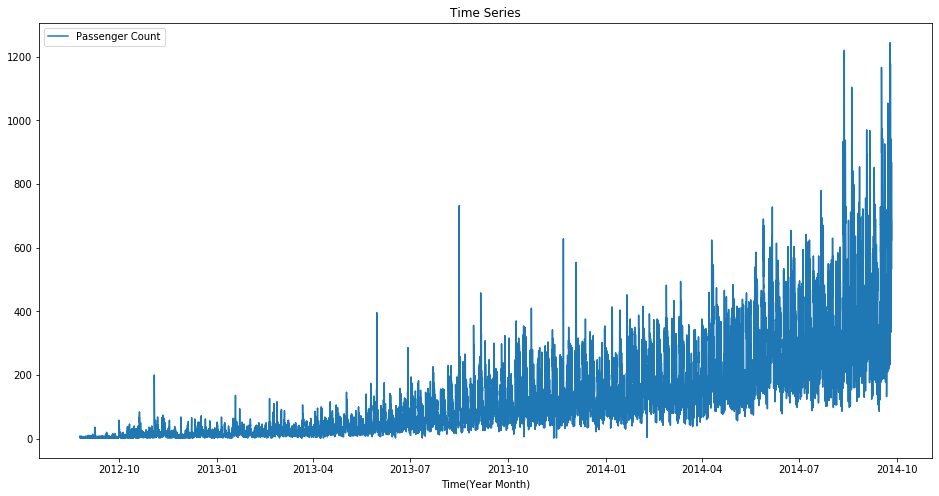

In [88]:
train.index=train['Datetime'] # creating index to make it on x axis.

df=train.drop('ID',1) # 1 refer for columns
plt.figure(figsize=(16,8))
ts=df['Count'] # it has datetime as index and count as column 
plt.plot(ts, label="Passenger Count")
plt.title('Time Series')
plt.xlabel("Time(Year Month)")
plt.legend()

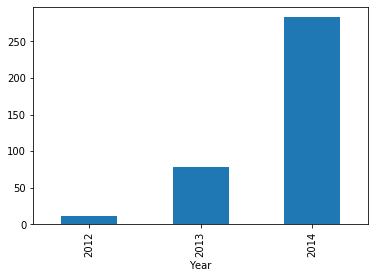

In [97]:
train.groupby('Year').mean()
train.groupby('Year')['Count'].mean().plot.bar() # when need to refer plt and and when not


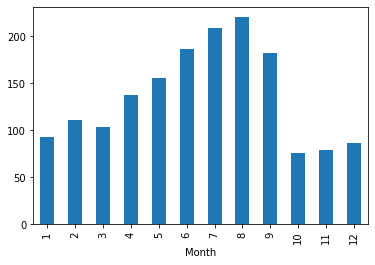

In [98]:
train.groupby('Month')['Count'].mean().plot.bar() # when need to refer plt and and when not